# 회귀
## 1. 소개
- 회귀 계수가 선형이냐 아니냐 : 선형 회귀 / 비선형 회귀
- 독립변수 개수가 몇 개냐 : 단일 회귀 / 다중 회귀
로 나뉠 수 있다.


- 지도학습의 두 가지, 분류는 Category값, 회귀는 연속형 숫자값을 예측하는 것
- 선형 회귀가 제일 많이 사용됨, 선형 회귀의 과적합 문제를 해결하기 위한 Regularization에 따라 또 나뉨
- Ridge : L2규제 ; 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 작게 함
- Lasso : L1규제 ; L1은 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어서, 회귀 예측시 피처가 선택되지 않게 함. => 피처 선택 기능 으로도 불림
- ElasticNet : L2, L1 다 함. 피처가 많을 때 사용, L1으로 개수를 줄임 + L2로 값을 조절
- Logistic : 분류이다

## 2. 단순 선형 회귀를 통한 회귀 이해
- RSS : (실제값 - 예측값의 제곱)의 평균
- 이런 걸 비용 함수라고 함, 회귀 알고리즘은 데이터를 계속 학습하면서 비용함수가 만환하는 값을 지속해서 감소시켜 최종적으로 더 이상 감소하지 않는 최소 오류값을 구하는 것. (손실함수)

## 3. 비용 최소화하기 - 경사 하강법
- 2차 함수(단일 선형 회귀)의 경우는 미분해서 미분값 = 0 이되는 w를 구하면 되는데
- 다중 선형회귀에서는 그렇게 못함. -> 경사 하강법 사용, __머신러닝의 핵심 기법__
- 오류가 작아지는 방향으로 w 파라미터를 계속해서 수정해 나간다. 어떻게?
- w_new = w_old - y*dR(w)/dw (y는 예타)

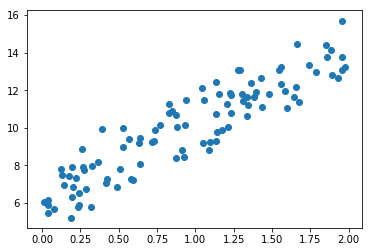

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 근사하기(w1 = 4, w0 = 6), 노이즈를 위해 임의의 값 설정
# np.random.rand(m, n) : (m, n) shape array from unform distribution
# np.random.randn(m, n) : (m, n) shape array from Gaussian distribution
X = 2*np.random.rand(100,1) 
y = 6+4*X+np.random.randn(100,1)

# X, y 데이터 산점도 시각화
plt.scatter(X, y)

In [3]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred)/N)
    return cost

In [4]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    
    w0_factors = np.ones((N, 1))
    
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [5]:
def gradient_descent_steps(X, y, iters = 10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [6]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1, w0", w1, w0)
y_pred = w1[0,0]*X + w0
print('Total Cost', get_cost(y, y_pred))

w1, w0 [[4.02181364]] [[6.16203122]]
Total Cost 0.9934784315632571


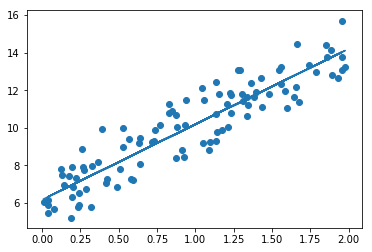

In [7]:
plt.scatter(X, y)
plt.plot(X, y_pred)

### 확률적 경사 하강법 : 일부 데이터만 이용해 w 업데이트 값을 계산(+미니배치)
- 다중 공선성 : 피처 간의 상관관계가 매우 높은 경우 분산이 커짐, 그래서 중요한 피처만 남기고 제거하거나 규제를 적용 (PCA도)
- 평가 지표 : MAE, MSE, RMSE, R^2
- MAE : 절댓값의 평균
- MSE : 제곱의 평균
- RMSE : Root MSE
- R^2 : 분산 기반으로 평가, 예측값 분산/실제값 분산. 1에 가까울수록 정확도가 높다. 


- cross_val_score, GridSearchCV에서의 Scoring함수에 회귀평가지표를 사용할 때, Scoring함수는 커질수록 좋은 의미가 되는게 default라서 작은게 좋아지도록 하기 위해 -를 붙인 neg_mean_absolute_error 와 같은 걸 사용한다... 그래야 -1이 -10보다 커져서 더 좋아지게됨.



In [10]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y,
                                                  learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1', w1, 'w0', w0)
y_pred = w1[0, 0] * X +w0
print('Total cost:', get_cost(y, y_pred))

w1 [[4.02826291]] w0 [[6.15645891]]
Total cost: 0.9937111256675346


In [12]:
# 보스턴 주택가격 예측

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston dataset load
boston = load_boston()

# boston dataset into DataFrame shape
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston dataset target is PRICE, ADD PRICE column into DataFrame
bostonDF['PRICE'] = boston.target
print('Boston dataset shape :', bostonDF.shape)
bostonDF.head()

Boston dataset shape : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


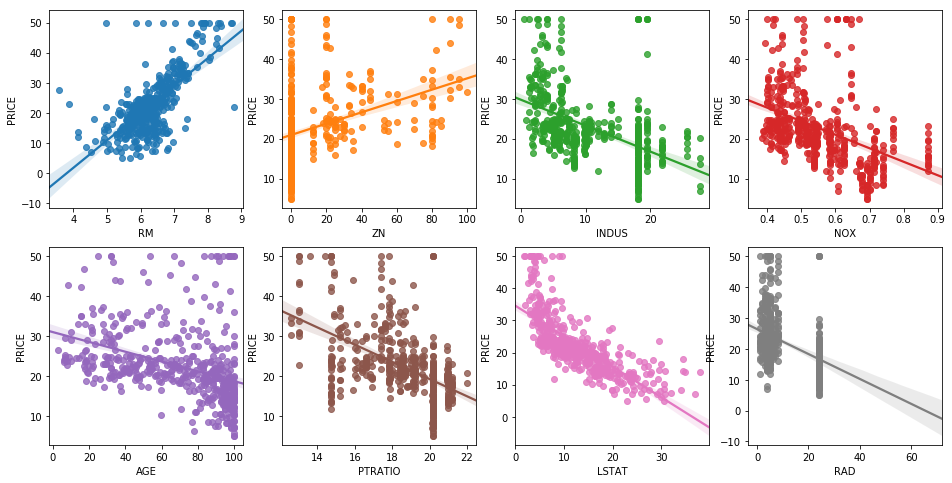

In [13]:
# 각 칼럼이 회귀 결과에 미치는 영향이 어느 정도일지/
# 8개의 칼럼에 대해 값 증가할수록 PRICE가 어떻게 변할지
# 2개 행, 4개 열 가진 subplots 이용. axs : 4*2
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

RM, 방의 크기가 클수록 가격이 증가. LSTAT, 하위 계층 비율이 적을수록 가격이 증가.

In [16]:
# 회귀모델 만들기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                   random_state = 156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print("MSE", mse, 'rmse', rmse)
print('variance score :', r2_score(y_test, y_preds))

print('intercept', lr.intercept_)
print('coeff', np.round(lr.coef_, 1))

MSE 17.296915907902058 rmse 4.158956107955704
variance score : 0.7572263323138935
intercept 40.9955951721646
coeff [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [18]:
# 5개 폴드에서 cross validation
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score 5폴드
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#
print('개별 MSE', np.round(neg_mse_scores, 2))
print('RMSE', np.round(rmse_scores, 2))
print('RMSE mean', avg_rmse)

개별 MSE [-12.46 -26.05 -33.07 -80.76 -33.31]
RMSE [3.53 5.1  5.75 8.99 5.77]
RMSE mean 5.828658946215838


## 5. 다항회귀, 과대/과소적합
- 다항회귀 : 일차방정식이 아니고 다차방정식으로 표현되는 것
- 비선형 회귀는 회귀 계수가 선형/비선형인지에 따른 것, 독립변수의 선형/비선형 여부와는 무관하다.
- 사이킷런은 다항회귀 클래스가 없지만, 다항 회귀도 선형 회귀니까 비선형 함수를 선형 모델에 적용시킴으로써 구현한다.
- PolynomialFeatures 클래스를 이용해 피처를 다항식 피처로 변환

In [23]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수', X)

poly = PolynomialFeatures(degree=2) # 2 하면 2차 다항식으로 변환됨
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수', poly_ftr)

일차 단항식 계수 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [27]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature', X)
y = polynomial_func(X)
print("삼차 다항식 결정값:", y)

일차 단항식 계수 feature [[0 1]
 [2 3]]
삼차 다항식 결정값: [  5 125]


In [28]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:', poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)
print('coef', model.coef_)
print('Shape', model.coef_.shape)

3차 다항식 계수 feature: [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
coef [0.         0.18018018 0.18018018 0.36036036 0.54054054 0.72072072
 0.72072072 1.08108108 1.62162162 2.34234234]
Shape (10,)


In [29]:
# pipeline 객체 이용해서 한 번에 다항 회귀를 구현한다.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('계수 :', np.round(model.named_steps['linear'].coef_, 2))

계수 : [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [30]:
# 다항회귀 이용한 과소적합 과대적합 이해

## 6. 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 10)
neg_mse_scores=cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error',
                              cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print(neg_mse_scores)
print(rmse_scores)
print(avg_rmse)

[-11.4217962  -24.29446706 -28.14355069 -74.59916618 -28.51714218]
[3.3796148  4.92894178 5.30504955 8.63708088 5.3401444 ]
5.5181662808689715


In [36]:
# Lasso
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('######',model_name,'######')
    for param in params :
        if model_name == 'Ridge' : model = Ridge(alpha = param)
        elif model_name == 'Lasso' : model = Lasso(alpha = param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7)
            
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n,
                                        scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha : {}, RMSE : {}'.format(param, avg_rmse))
        
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index = X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname]=coeff
            
    return coeff_df


In [37]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data,
                                     y_target_n=y_target)

###### Lasso ######
alpha : 0.07, RMSE : 5.6122842675266735
alpha : 0.1, RMSE : 5.615116035266935
alpha : 0.5, RMSE : 5.669123409594897
alpha : 1, RMSE : 5.776020813823376
alpha : 3, RMSE : 6.188763210800905


In [38]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

###### ElasticNet ######
alpha : 0.07, RMSE : 5.54165434734814
alpha : 0.1, RMSE : 5.52592849629491
alpha : 0.5, RMSE : 5.466748649445586
alpha : 1, RMSE : 5.596874445109748
alpha : 3, RMSE : 6.068121638621164


In [44]:
# 선형회귀모델 데이터 변환 :
# 1. StandardScaler or MinMaxScaler
# 2. 다항 특성 적용하여 변환(아까 한거)
# 3. 로그 변환

# 타깃값의 경우 일반적으로 로그 변환을 적용한다. 정규분포나 다른 정규값으로 변환하면 다시
# 원본값으로 돌리기 어려울 수 있다.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def get_scaled_data(method='None', p_degree=None, input_data=None): #p_degree는 2이하
    if method=='Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method=='MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method=='Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,
                                        include_bias=False).fit_transform(scaled_data)
        
    return scaled_data

In [45]:
alphas = [0.1, 1, 10, 100]

scale_methods=[(None, None),('Standard',None), ('Standard', 2),
              ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                   input_data = X_data)
    print(scale_method)
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled,
                       y_target_n=y_target, verbose=False, return_coeff=False)

(None, None)
alpha : 0.1, RMSE : 5.788486627032411
alpha : 1, RMSE : 5.652570965613547
alpha : 10, RMSE : 5.5181662808689715
alpha : 100, RMSE : 5.329589628472148
('Standard', None)
alpha : 0.1, RMSE : 5.825992799389442
alpha : 1, RMSE : 5.8028895172577375
alpha : 10, RMSE : 5.636831222559072
alpha : 100, RMSE : 5.421374711794966
('Standard', 2)
alpha : 0.1, RMSE : 8.827235873001971
alpha : 1, RMSE : 6.871287525962387
alpha : 10, RMSE : 5.484870425533342
alpha : 100, RMSE : 4.634437778261923
('MinMax', None)
alpha : 0.1, RMSE : 5.763570225288301
alpha : 1, RMSE : 5.465045081564936
alpha : 10, RMSE : 5.754163637679423
alpha : 100, RMSE : 7.634919863623537
('MinMax', 2)
alpha : 0.1, RMSE : 5.297560003127093
alpha : 1, RMSE : 4.322660371524889
alpha : 10, RMSE : 5.185204257580535
alpha : 100, RMSE : 6.537866889704364
('Log', None)
alpha : 0.1, RMSE : 4.770429614681665
alpha : 1, RMSE : 4.676227018966879
alpha : 10, RMSE : 4.836439992635269
alpha : 100, RMSE : 6.2409162327190355


## 7. 로지스틱 회귀

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target,
                                                   test_size = 0.3, random_state=0)

In [50]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

print(accuracy_score(y_test, lr_preds))
print(roc_auc_score(y_test, lr_preds))

0.9766081871345029
0.9715608465608465


In [51]:
from sklearn.model_selection import GridSearchCV
# 나중에

## 8 회귀 트리